# 第1章: NetworkX入門

## 学習目標
- NetworkXとは何か理解する
- グラフ理論の基本概念を学ぶ
- NetworkXのインストールと基本的な使い方を習得する

## 難易度: 初級

---
## 1.1 NetworkXとは？

**NetworkX**は、Pythonでグラフ（ネットワーク）構造を作成、操作、分析するためのライブラリです。

### 主な特徴
- 様々な種類のグラフをサポート（無向グラフ、有向グラフ、マルチグラフなど）
- 豊富なグラフアルゴリズムを提供
- 可視化機能
- 柔軟なデータ構造

### 適用分野
- ソーシャルネットワーク分析
- 生物学的ネットワーク
- 交通・通信ネットワーク
- Webページのリンク構造
- 組織間の関係分析

---
## 1.2 グラフ理論の基本概念

### グラフとは
グラフ $G$ は、**ノード（頂点）** の集合 $V$ と **エッジ（辺）** の集合 $E$ から構成されます。

$$G = (V, E)$$

### 基本用語
| 用語 | 説明 |
|------|------|
| ノード (Node/Vertex) | グラフの構成要素、点として表現 |
| エッジ (Edge) | ノード間の接続関係、線として表現 |
| 次数 (Degree) | ノードに接続するエッジの数 |
| 経路 (Path) | ノード間を結ぶエッジの列 |
| 連結 (Connected) | すべてのノード間に経路が存在する状態 |

---
## 1.3 NetworkXのインストール

### pipを使用する場合
```bash
pip install networkx
```

### condaを使用する場合
```bash
conda install networkx
```

### 可視化機能を含める場合
```bash
pip install networkx[default]
```

In [1]:
# NetworkXのインストール確認
import networkx as nx
print(f"NetworkX version: {nx.__version__}")

NetworkX version: 3.6.1


In [2]:
# 可視化のための追加ライブラリ
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.rcParams['font.sans-serif'] = ['IPAexGothic'] + plt.rcParams['font.sans-serif']
%matplotlib inline

---
## 1.4 最初のグラフを作成する

In [3]:
# 空のグラフを作成
G = nx.Graph()
print(f"グラフのタイプ: {type(G)}")
print(f"ノード数: {G.number_of_nodes()}")
print(f"エッジ数: {G.number_of_edges()}")

グラフのタイプ: <class 'networkx.classes.graph.Graph'>
ノード数: 0
エッジ数: 0


In [4]:
# ノードを追加
G.add_node(1)
G.add_node(2)
G.add_node("A")  # 文字列もノードになれる

print(f"ノード一覧: {list(G.nodes())}")
print(f"ノード数: {G.number_of_nodes()}")

ノード一覧: [1, 2, 'A']
ノード数: 3


In [5]:
# エッジを追加
G.add_edge(1, 2)
G.add_edge(2, "A")
G.add_edge(1, "A")

print(f"エッジ一覧: {list(G.edges())}")
print(f"エッジ数: {G.number_of_edges()}")

エッジ一覧: [(1, 2), (1, 'A'), (2, 'A')]
エッジ数: 3


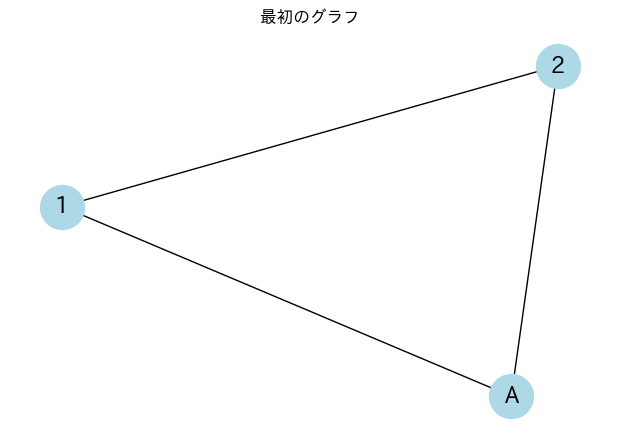

In [6]:
# グラフを可視化
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=16, font_weight='bold')
plt.title("最初のグラフ")
plt.show()

---
## 例題1: 友人関係グラフの作成

以下の友人関係をグラフで表現してみましょう。
- 太郎と花子は友人
- 花子と次郎は友人
- 次郎と太郎は友人
- 美香は花子の友人

In [7]:
# 友人関係グラフの作成
friends = nx.Graph()

# エッジを追加（ノードは自動的に追加される）
friends.add_edge("太郎", "花子")
friends.add_edge("花子", "次郎")
friends.add_edge("次郎", "太郎")
friends.add_edge("美香", "花子")

print(f"友人グループのメンバー: {list(friends.nodes())}")
print(f"友人関係の数: {friends.number_of_edges()}")

友人グループのメンバー: ['太郎', '花子', '次郎', '美香']
友人関係の数: 4


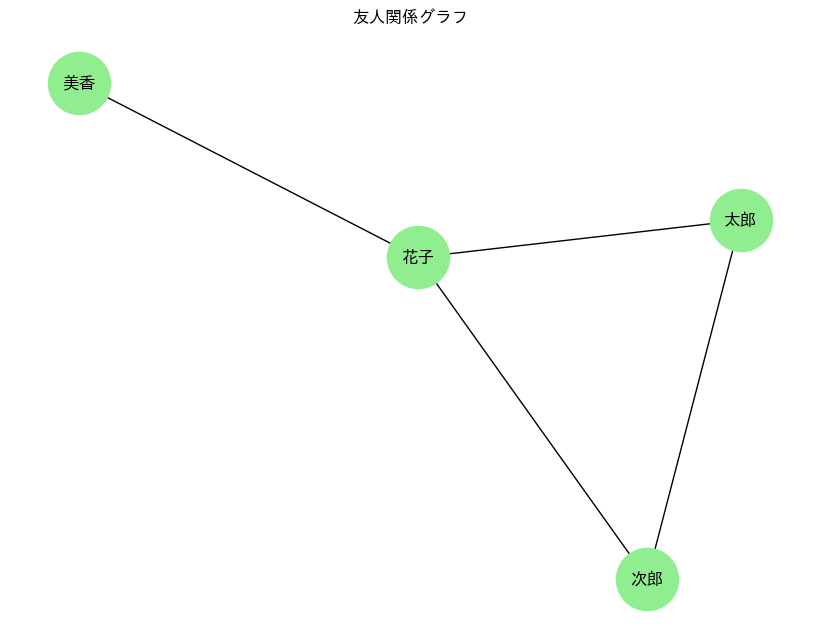

In [8]:
# 可視化
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(friends, seed=42)
nx.draw(friends, pos, with_labels=True, node_color='lightgreen',
        node_size=2000, font_size=12, font_weight='bold')
plt.title("友人関係グラフ")
plt.show()

In [9]:
# 各人の友人数（次数）を確認
for person in friends.nodes():
    print(f"{person}の友人数: {friends.degree(person)}人")

太郎の友人数: 2人
花子の友人数: 3人
次郎の友人数: 2人
美香の友人数: 1人


---
## 例題2: グラフ情報の取得

作成したグラフから様々な情報を取得してみましょう。

In [10]:
# グラフの基本情報
print("=== グラフの基本情報 ===")
print(f"ノード数: {friends.number_of_nodes()}")
print(f"エッジ数: {friends.number_of_edges()}")
print(f"連結か？: {nx.is_connected(friends)}")

=== グラフの基本情報 ===
ノード数: 4
エッジ数: 4
連結か？: True


In [11]:
# 特定のノードの隣接ノード
print("\n=== 花子の友人一覧 ===")
print(list(friends.neighbors("花子")))


=== 花子の友人一覧 ===
['太郎', '次郎', '美香']


In [12]:
# エッジの存在確認
print("\n=== 友人関係の確認 ===")
print(f"太郎と花子は友人か？: {friends.has_edge('太郎', '花子')}")
print(f"太郎と美香は友人か？: {friends.has_edge('太郎', '美香')}")


=== 友人関係の確認 ===
太郎と花子は友人か？: True
太郎と美香は友人か？: False


---
## 1.5 グラフの種類の概要

NetworkXでは4種類の主要なグラフタイプを提供しています。

| クラス | 説明 | 特徴 |
|--------|------|------|
| `Graph` | 無向グラフ | 双方向の関係、自己ループなし |
| `DiGraph` | 有向グラフ | 一方向の関係 |
| `MultiGraph` | 無向マルチグラフ | 複数エッジ可能 |
| `MultiDiGraph` | 有向マルチグラフ | 複数の有向エッジ可能 |

In [13]:
# 各グラフタイプの作成例
G_undirected = nx.Graph()           # 無向グラフ
G_directed = nx.DiGraph()           # 有向グラフ
G_multi = nx.MultiGraph()           # 無向マルチグラフ
G_multi_directed = nx.MultiDiGraph()  # 有向マルチグラフ

print("利用可能なグラフタイプ:")
print(f"- {type(G_undirected).__name__}")
print(f"- {type(G_directed).__name__}")
print(f"- {type(G_multi).__name__}")
print(f"- {type(G_multi_directed).__name__}")

利用可能なグラフタイプ:
- Graph
- DiGraph
- MultiGraph
- MultiDiGraph


---
## 練習問題

### 練習問題1: 基本的なグラフの作成

以下の条件を満たすグラフを作成してください。

1. ノード: A, B, C, D, E の5つ
2. エッジ: A-B, B-C, C-D, D-E, E-A, A-C
3. グラフを可視化する

In [14]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# グラフの作成
G = nx.Graph()

# ノードを追加
G.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# エッジを追加
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A'), ('A', 'C')]
G.add_edges_from(edges)

# グラフ情報の表示
print(f"ノード: {list(G.nodes())}")
print(f"エッジ: {list(G.edges())}")
print(f"ノード数: {G.number_of_nodes()}")
print(f"エッジ数: {G.number_of_edges()}")

# 可視化
plt.figure(figsize=(8, 6))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightcoral',
        node_size=1500, font_size=14, font_weight='bold')
plt.title("練習問題1の解答")
plt.show()
```
</details>

### 練習問題2: 組織図のグラフ化

以下の組織構造をグラフで表現してください。

```
社長
├── 営業部長
│   ├── 営業課長A
│   └── 営業課長B
└── 技術部長
    ├── 開発課長
    └── 品質課長
```

ヒント: この場合、有向グラフ（DiGraph）が適切かもしれません。

In [15]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# 有向グラフで組織図を表現
org = nx.DiGraph()

# 上司→部下の関係をエッジとして追加
org.add_edge("社長", "営業部長")
org.add_edge("社長", "技術部長")
org.add_edge("営業部長", "営業課長A")
org.add_edge("営業部長", "営業課長B")
org.add_edge("技術部長", "開発課長")
org.add_edge("技術部長", "品質課長")

# グラフ情報
print(f"社員数: {org.number_of_nodes()}")
print(f"上下関係の数: {org.number_of_edges()}")

# 社長の直属の部下
print(f"社長の直属部下: {list(org.successors('社長'))}")

# 可視化（階層構造風に）
plt.figure(figsize=(10, 8))
pos = {
    '社長': (0.5, 1),
    '営業部長': (0.25, 0.6),
    '技術部長': (0.75, 0.6),
    '営業課長A': (0.1, 0.2),
    '営業課長B': (0.4, 0.2),
    '開発課長': (0.6, 0.2),
    '品質課長': (0.9, 0.2)
}
nx.draw(org, pos, with_labels=True, node_color='lightyellow',
        node_size=2500, font_size=10, font_weight='bold',
        arrows=True, arrowsize=20)
plt.title("組織図")
plt.show()
```
</details>

### 練習問題3: グラフの分析

以下のグラフを作成し、各ノードの次数と、グラフが連結かどうかを調べてください。

ノード: 1, 2, 3, 4, 5, 6  
エッジ: (1,2), (2,3), (3,1), (4,5), (5,6), (6,4)

In [16]:
# ここにコードを記述してください



<details>
<summary>解答を見る</summary>

```python
# グラフの作成
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,1), (4,5), (5,6), (6,4)])

# 各ノードの次数
print("=== 各ノードの次数 ===")
for node in G.nodes():
    print(f"ノード {node}: 次数 {G.degree(node)}")

# 連結かどうか
print(f"\nグラフは連結か？: {nx.is_connected(G)}")

# 連結成分の数
components = list(nx.connected_components(G))
print(f"連結成分の数: {len(components)}")
print(f"連結成分: {components}")

# 可視化
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=14, font_weight='bold')
plt.title("2つの独立した三角形")
plt.show()
```
</details>

---
## 1.6 章のまとめ

この章では以下を学びました：

1. **NetworkXの概要**: グラフ分析のためのPythonライブラリ
2. **グラフ理論の基本**: ノード、エッジ、次数などの概念
3. **基本操作**: グラフの作成、ノード・エッジの追加、情報取得
4. **可視化**: `nx.draw()`を使った簡単な可視化

### 次章の予告
次章ではグラフの基本操作についてより詳しく学びます。

---
## 参考資料

- [NetworkX公式ドキュメント](https://networkx.org/documentation/stable/)
- [NetworkX Tutorial](https://networkx.org/documentation/stable/tutorial.html)
- [グラフ理論入門（Wikipedia）](https://ja.wikipedia.org/wiki/グラフ理論)